In [3]:
import pandas as pd
import numpy as mp
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('data/Tetuan City power consumption.csv',index_col=False)

In [3]:
df.head(4)

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711


In [4]:
df.isnull().sum()

DateTime                     0
Temperature                  0
Humidity                     0
Wind Speed                   0
general diffuse flows        0
diffuse flows                0
Zone 1 Power Consumption     0
Zone 2  Power Consumption    0
Zone 3  Power Consumption    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateTime                   52416 non-null  object 
 1   Temperature                52416 non-null  float64
 2   Humidity                   52416 non-null  float64
 3   Wind Speed                 52416 non-null  float64
 4   general diffuse flows      52416 non-null  float64
 5   diffuse flows              52416 non-null  float64
 6   Zone 1 Power Consumption   52416 non-null  float64
 7   Zone 2  Power Consumption  52416 non-null  float64
 8   Zone 3  Power Consumption  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [6]:
categorica_val=df.columns[df.dtypes == 'O']
numerical_val=df.columns[df.dtypes != 'O']
print("categorical: ",categorica_val)
print("numerical_val: ",numerical_val)

categorical:  Index(['DateTime'], dtype='object')
numerical_val:  Index(['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows',
       'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption'],
      dtype='object')


In [15]:
# devide this dataset into three datasets
df.rename(columns={"Zone 1 Power Consumption":"zone_1","Zone 2  Power Consumption":"zone_2","Zone 3  Power Consumption":"zone_3"},inplace = True)


In [16]:
df.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,zone_1,zone_2,zone_3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [17]:
df.corr()

ValueError: could not convert string to float: '1/1/2017 0:00'

In [31]:
df["seconds"] = [int(i.split(" ")[-1].split(":")[0])*60+int(i.split(" ")[-1].split(":")[1]) for i in df["DateTime"]]

In [32]:
df.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,zone_1,zone_2,zone_3,seconds
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,0
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,10
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,20
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,30
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,40


In [33]:
df.drop(columns=["DateTime"],inplace=True)

In [35]:
df.tail(20)

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,zone_1,zone_2,zone_3,seconds
52396,9.370,64.52,0.085,0.073,0.089,36879.08745,31828.16815,16929.65186,1240
52397,9.290,64.25,0.085,0.070,0.085,36623.57414,31806.07548,16941.17647,1250
52398,8.800,65.49,0.082,0.088,0.115,36343.72624,31345.81160,16877.79112,1260
52399,7.890,69.83,0.080,0.062,0.134,35832.69962,31250.07671,16825.93037,1270
52400,7.640,71.70,0.082,0.081,0.078,35613.68821,31062.28905,16693.39736,1280
52401,7.950,70.20,0.082,0.062,0.085,35297.33840,30852.40871,16589.67587,1290
52402,7.650,71.10,0.082,0.084,0.093,34591.63498,30347.95950,16485.95438,1300
52403,8.140,69.73,0.081,0.062,0.085,34469.96198,29688.86161,16180.55222,1310
52404,8.090,68.49,0.079,0.070,0.085,34920.15209,29445.84228,16053.78151,1320
52405,7.640,70.10,0.083,0.055,0.119,34737.64259,29132.86284,15834.81393,1330


In [36]:
df.corr()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,zone_1,zone_2,zone_3,seconds
Temperature,1.000000,-0.460243,0.477109,0.460294,0.196522,0.440221,0.382428,0.489527,0.196961
Humidity,-0.460243,1.000000,-0.135853,-0.468138,-0.256886,-0.287421,-0.294961,-0.233022,-0.242466
Wind Speed,0.477109,-0.135853,1.000000,0.133733,-0.000972,0.167444,0.146413,0.278641,0.004132
general diffuse flows,0.460294,-0.468138,0.133733,1.000000,0.564718,0.187965,0.157223,0.063376,0.129859
diffuse flows,0.196522,-0.256886,-0.000972,0.564718,1.000000,0.080274,0.044667,-0.038506,0.130723
zone_1,0.440221,-0.287421,0.167444,0.187965,0.080274,1.000000,0.834519,0.750733,0.727352
zone_2,0.382428,-0.294961,0.146413,0.157223,0.044667,0.834519,1.000000,0.570932,0.662800
zone_3,0.489527,-0.233022,0.278641,0.063376,-0.038506,0.750733,0.570932,1.000000,0.453875
seconds,0.196961,-0.242466,0.004132,0.129859,0.130723,0.727352,0.662800,0.453875,1.000000


<Axes: >

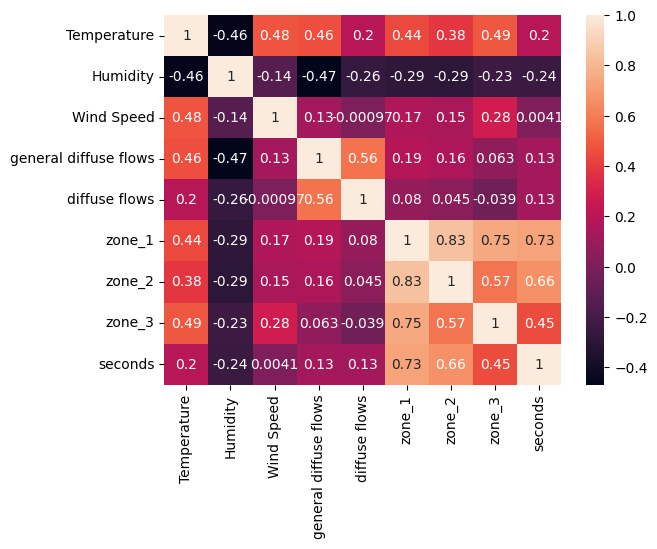

In [38]:
sns.heatmap(df.corr(),annot=True)

In [1]:
# Zometo EDA


In [5]:
df = pd.read_csv("data/zomato.csv",index_col=None)

In [6]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [9]:
len(df.cuisines.unique())

2724

In [10]:
df.drop(columns=["url"],inplace=True)

In [35]:
df

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,target,reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [18]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [19]:
import category_encoders as ce
target_encoder = ce.TargetEncoder(cols="location")
target_encoder.fit(df["location"],df["approx_cost(for two people)"])
df["location_encode"] = target_encoder.transform(df["location"])

TypeError: can only concatenate str (not "int") to str

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      51717 non-null  object
 1   name                         51717 non-null  object
 2   online_order                 51717 non-null  object
 3   book_table                   51717 non-null  object
 4   rate                         43942 non-null  object
 5   votes                        51717 non-null  int64 
 6   phone                        50509 non-null  object
 7   location                     51696 non-null  object
 8   rest_type                    51490 non-null  object
 9   dish_liked                   23639 non-null  object
 10  cuisines                     51672 non-null  object
 11  approx_cost(for two people)  51371 non-null  object
 12  reviews_list                 51717 non-null  object
 13  menu_item                    51

In [31]:
df.rename(columns={"approx_cost(for two people)":"target"},inplace=True)

In [34]:
len(df.target.unique())

71

In [36]:
df = pd.read_csv("data/bottle.csv")

/tmp/ipykernel_4060/215334566.py:1: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/bottle.csv")


In [38]:
df.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df.columns

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')

In [42]:
# EDA of weather data
df = pd.read_csv("data/weatherHistory.csv")

In [43]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [44]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [46]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [47]:
df.drop(columns=["Formatted Date","Daily Summary"],inplace=True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   96453 non-null  object 
 1   Precip Type               95936 non-null  object 
 2   Temperature (C)           96453 non-null  float64
 3   Apparent Temperature (C)  96453 non-null  float64
 4   Humidity                  96453 non-null  float64
 5   Wind Speed (km/h)         96453 non-null  float64
 6   Wind Bearing (degrees)    96453 non-null  float64
 7   Visibility (km)           96453 non-null  float64
 8   Loud Cover                96453 non-null  float64
 9   Pressure (millibars)      96453 non-null  float64
dtypes: float64(8), object(2)
memory usage: 7.4+ MB


In [50]:
numerica_object=df.columns[df.dtypes != "O"]
categorical_object=df.columns[df.dtypes == "O"]
print("numerica_object: ",numerica_object)
print("categorical_object: ",categorical_object)

numerica_object:  Index(['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Loud Cover', 'Pressure (millibars)'],
      dtype='object')
categorical_object:  Index(['Summary', 'Precip Type'], dtype='object')


In [52]:
df["Precip Type"].unique()

array(['rain', 'snow', nan], dtype=object)